In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
df = pd.read_csv(r"data_understanding_output.csv",skipinitialspace=True)

In [4]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

word    object
PoS     object
dtype: object

In [46]:
df_train = df.drop(['word','PoS', 'polysemy', 'length', 'number_of_meanings'], axis=1)
df_train.dtypes

arousal                          float64
valence                          float64
dominance                        float64
concreteness                     float64
imageability                     float64
familiarity                      float64
aoa                              float64
semsize                          float64
gender                           float64
log_freq                         float64
avg_variance_between_meanings    float64
sentiment                        float64
dtype: object

In [47]:
df_train.columns

Index(['arousal', 'valence', 'dominance', 'concreteness', 'imageability',
       'familiarity', 'aoa', 'semsize', 'gender', 'log_freq',
       'avg_variance_between_meanings', 'sentiment'],
      dtype='object')

In [48]:
from sklearn import preprocessing

In [49]:
import warnings
warnings.filterwarnings('ignore')


In [50]:
cols = [col for col in df_train.columns]
X = df[cols].values

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

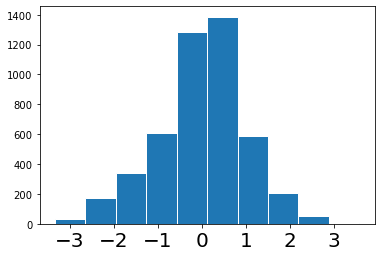

In [51]:
plt.hist(X_scal[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

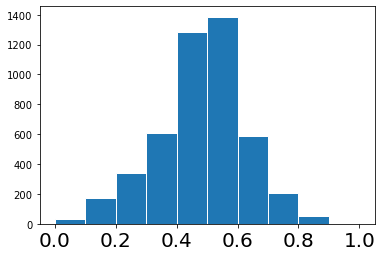

In [52]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

plt.hist(X_minmax[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

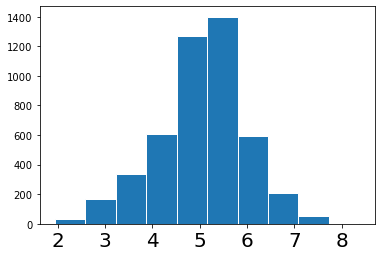

In [53]:
plt.hist(X[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

In [54]:
kmeans = KMeans( n_clusters=5, n_init=20, max_iter=100 )
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=5, n_init=20)

In [55]:
kmeans.labels_

array([4, 4, 1, ..., 1, 0, 1], dtype=int32)

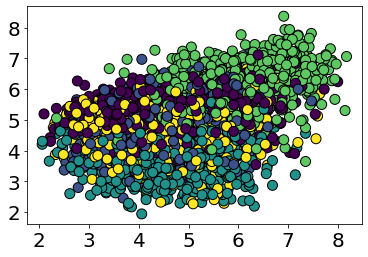

In [56]:
plt.scatter( X[:,0], X[:,2], s=100, edgecolor='black', c= kmeans.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [57]:
kmeans.cluster_centers_

array([[0.40274568, 0.60617346, 0.5180422 , 0.8423956 , 0.86997374,
        0.79671088, 0.29230276, 0.38803568, 0.48464045, 0.56250921,
        0.04567381, 0.5036526 ],
       [0.37321196, 0.48900336, 0.45535241, 0.33497388, 0.29745878,
        0.52425581, 0.73656751, 0.51123586, 0.53391411, 0.45327314,
        0.00793359, 0.50058343],
       [0.42207228, 0.21080199, 0.29621318, 0.32925718, 0.40974754,
        0.71504655, 0.5176015 , 0.56667517, 0.56241631, 0.46886318,
        0.00602356, 0.22981878],
       [0.58025555, 0.74708091, 0.61373003, 0.32740844, 0.39444317,
        0.78253499, 0.48179487, 0.62176795, 0.45052496, 0.60386207,
        0.0188498 , 0.65784114],
       [0.36176845, 0.46429367, 0.44739239, 0.73838388, 0.720825  ,
        0.57096218, 0.59935934, 0.46241259, 0.58992634, 0.45151195,
        0.02133451, 0.49551793]])

In [58]:
centers = kmeans.cluster_centers_

In [59]:
centers = scaler.inverse_transform(centers)

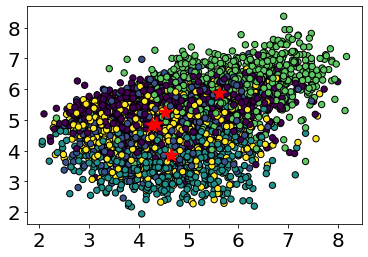

In [60]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,2], c='red', marker='*', s=200 )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

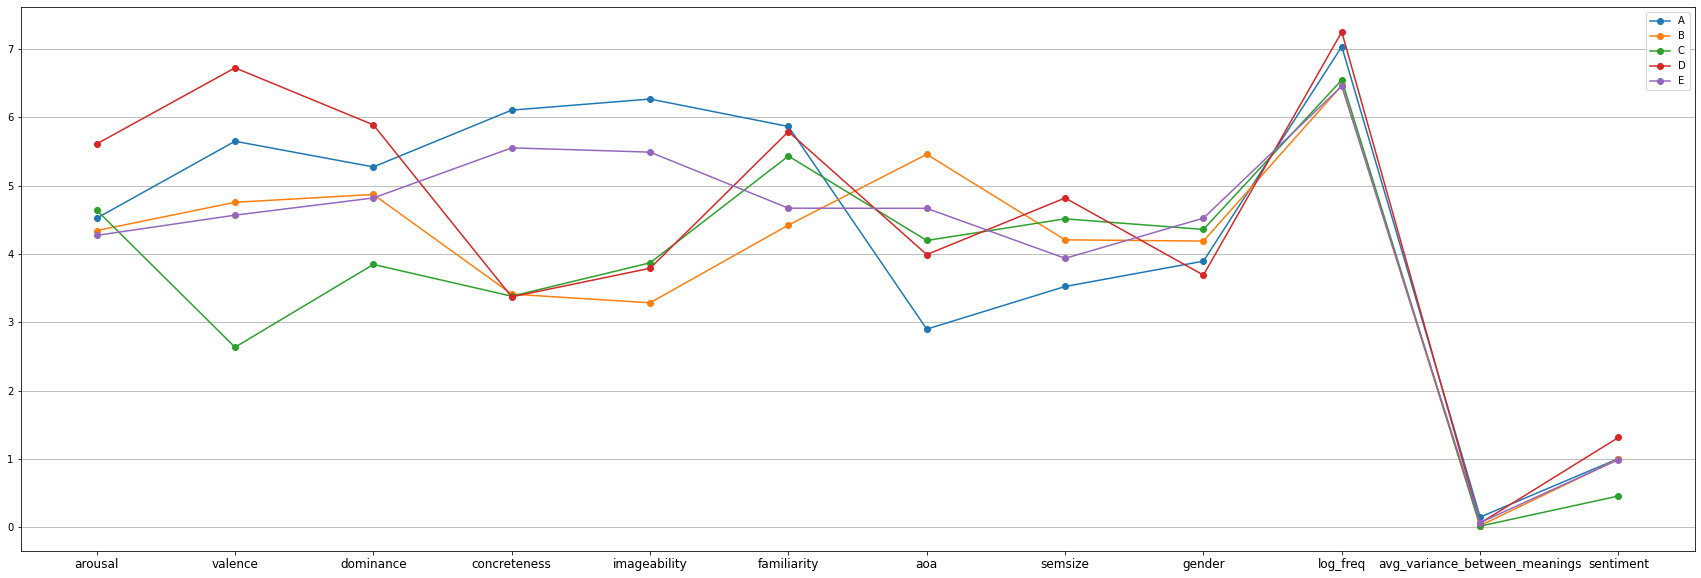

In [61]:
plt.figure(figsize=(30, 10))

clust_name = ['A', 'B', 'C','D','E']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(cols)), cols, fontsize=12)
plt.yticks(fontsize=10)

plt.legend(fontsize=10, loc='best')
plt.grid(axis='y')

[]

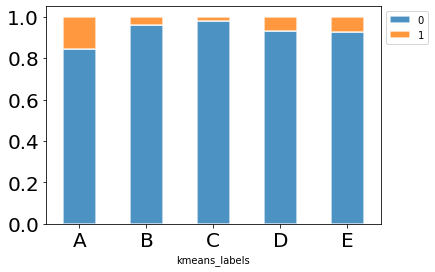

In [62]:
df_train['kmeans_labels'] = kmeans.labels_

bar_pl = df['polysemy'].groupby(df_train['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [63]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([1232,  857,  607,  982, 1004]))

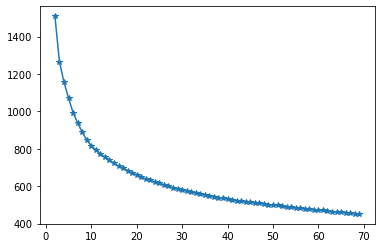

In [64]:
# kmeans
sse_list = list()
max_k = 70
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, )
    kmeans.fit(X_minmax)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list, marker='*')
plt.show()

In [24]:
doseprint('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 542.2725187642042
Silhouette 0.10892752701927401


In [25]:
train_data = df_train.values

In [26]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10, max_iter=100)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print('centers', kmeans.cluster_centers_)
print('labels', dict(zip(bins, hist)))
print('sse', kmeans.inertia_)
print('silhouette', silhouette_score(train_data, kmeans.labels_))



centers [[6.18161435e+00 4.29529821e+00 4.40825561e+00 4.75552466e+00
  3.25018386e+00 3.15227130e+00 4.10339686e+00 5.64638117e+00
  4.10825336e+00 4.24388117e+00 6.19941234e+00 4.70852018e-02
  1.87718128e-02 9.01345291e-01 1.99103139e+00]
 [5.22425249e+00 4.25148837e+00 5.37315116e+00 5.11861628e+00
  3.83006146e+00 3.81723754e+00 5.72260299e+00 3.58346013e+00
  3.94701329e+00 3.96504817e+00 7.52909681e+00 4.16943522e-01
  1.48228700e-01 1.02823920e+00 2.65780731e-02]
 [8.49003984e+00 4.38309562e+00 5.40150398e+00 5.13926295e+00
  6.04288247e+00 6.02728884e+00 5.21633865e+00 4.18363944e+00
  3.94974900e+00 4.28704980e+00 6.46989064e+00 3.18725100e-02
  1.62646911e-02 9.96015936e-01 3.55179283e+00]
 [4.53289474e+00 3.97433717e+00 5.16985197e+00 5.18969737e+00
  6.22401316e+00 6.29501809e+00 5.77567763e+00 2.86087336e+00
  3.06140789e+00 4.19627138e+00 6.99355100e+00 5.95394737e-01
  2.52569797e-01 1.00000000e+00 3.02467105e+00]
 [5.59640103e+00 5.47585861e+00 6.42633676e+00 5.4372210

In [27]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append( kmeans.inertia_ )

In [28]:
df_clusters = df_train
df_clusters['Labels'] = kmeans.labels_

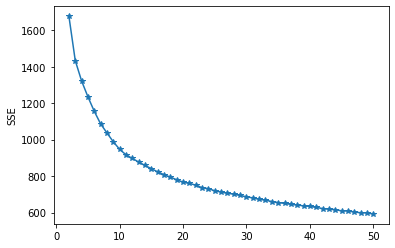

In [29]:
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

In [30]:
df_clusters[df_clusters['Labels']==3].describe()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,log_freq,number_of_meanings,avg_variance_between_meanings,sentiment,kmeans_labels,Labels
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0,155.0,155.000000,155.0,155.0
mean,4.722581,3.614084,5.265819,5.186265,6.519181,6.540774,6.010277,2.478729,2.386277,3.830981,6.848625,0.0,0.0,0.987097,3.0,3.0
std,1.142653,0.541467,0.493743,0.350164,0.245356,0.222261,0.438078,0.457571,0.556058,0.602495,0.456765,0.0,0.0,0.160644,0.0,0.0
min,3.000000,2.515000,2.697000,4.030000,5.353000,5.909000,4.879000,1.600000,1.375000,1.677000,5.762837,0.0,0.0,0.000000,3.0,3.0
25%,4.000000,3.257000,5.063000,5.029000,6.371000,6.384500,5.714500,2.191000,2.000000,3.433500,6.576456,0.0,0.0,1.000000,3.0,3.0
50%,5.000000,3.543000,5.294000,5.233000,6.588000,6.571000,6.063000,2.429000,2.344000,3.885000,6.826739,0.0,0.0,1.000000,3.0,3.0
75%,5.500000,3.919500,5.522500,5.354000,6.677000,6.721500,6.339500,2.772500,2.769000,4.232000,7.112653,0.0,0.0,1.000000,3.0,3.0
max,9.000000,5.424000,6.273000,6.364000,6.909000,6.941000,6.824000,3.943000,4.177000,5.333000,8.258606,0.0,0.0,2.000000,3.0,3.0


In [31]:
dbscan = DBSCAN( eps=0.3, min_samples=5)
dbscan.fit(X_minmax)

DBSCAN(eps=0.3)

In [32]:
dbscan.labels_

array([-1,  0, -1, ..., -1,  0,  0])

In [33]:
# density based clustering
print ('dbscan')

dbscan = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
dbscan.fit(X_minmax)



print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan
labels {0: 446, 1: 602, 2: 502, 3: 608, 4: 389, 5: 469, 6: 351, 7: 362, 8: 621, 9: 332}
silhouette -0.1735932667439063


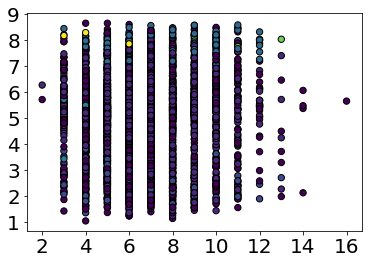

In [34]:
plt.scatter( X[:,0], X[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

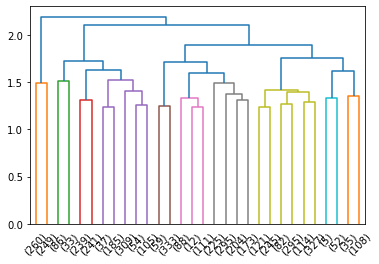

In [35]:
#hierarchical
data_dist = pdist(X_minmax, metric='euclidean')
data_link = linkage(data_dist, method='complete')

res = dendrogram(data_link, truncate_mode='lastp')

In [36]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hier.fit(X_minmax)

AgglomerativeClustering(linkage='single')

In [37]:
hier.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [39]:
# hierarchical clustering
connectivity = kneighbors_graph(train_data, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [40]:
print ('ward')
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, ward.labels_))

ward
labels {0: 927, 1: 907, 2: 547, 3: 684, 4: 979, 5: 638}
silhouette 0.16027674867122113


In [41]:
print ('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='manhattan',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage
labels {0: 4675, 1: 2, 2: 2, 3: 1, 4: 1, 5: 1}
silhouette 0.02679819108976286


In [42]:
print ('complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='l1',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print( 'labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, complete_linkage.labels_))

complete linkage
labels {0: 1665, 1: 2002, 2: 67, 3: 339, 4: 286, 5: 323}
silhouette -0.022083617033367996


In [43]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram